## 引言
中美贸易战自从去年3月引爆开始，持续了接近1年半，本文结合贸易战以来中美股市指数的变化以及贸易战时间线，来观察贸易战对中美股市的影响。本文使用的语言是**Python**，作图使用的是[Plotly](https://plot.ly/python/)工具包，数据源自[雅虎财经](https://hk.finance.yahoo.com)，通过[yfinance](https://pypi.org/project/fix-yahoo-finance/)工具包提取。

In [1]:
# 导入工具包
import yfinance as yf #雅虎财经数据包
import plotly.graph_objects as go #plotly包
import pandas as pd

In [2]:
# 设置每个warning不显示
import warnings

warnings.filterwarnings(action='ignore')

## 1. 股指数据准备

本文选取的指数代表是标普500和上证指数。我觉得相比大家更加熟悉的道琼斯指数，标普500更具代表性，其成分股数量较多，且覆盖的行业更广，并且标普500指数的值和上证指数接近，方便作图展示。

In [3]:
# 设置提取的数据为标普500和上证指数
tickers = ['^GSPC', '000001.SS'] # 指数代码可在雅虎财经网页找到

# 设置起始、结束时间
start_date = '2018-01-01'
end_date = '2019-08-28'

In [4]:
# 通过雅虎财经数据源获取数据
data = yf.download(tickers=tickers, start=start_date, end=end_date)

# 查看最近5日数据
data.tail()

[*********************100%***********************]  2 of 2 downloaded


Adj Close              Close               High                Low  \
           000001.SS    ^GSPC 000001.SS    ^GSPC 000001.SS    ^GSPC 000001.SS   
Date                                                                            
2019-08-22   2883.44  2922.95   2883.44  2922.95   2888.50  2939.08   2867.55   
2019-08-23   2897.43  2847.11   2897.43  2847.11   2902.46  2927.01   2878.74   
2019-08-26   2863.57  2878.38   2863.57  2878.38   2870.49  2879.27   2849.24   
2019-08-27   2902.19  2869.16   2902.19  2869.16   2919.64  2898.79   2879.41   
2019-08-28   2893.76      NaN   2893.76      NaN   2905.44      NaN   2887.01   

                         Open             Volume                
              ^GSPC 000001.SS    ^GSPC 000001.SS         ^GSPC  
Date                                                            
2019-08-22  2904.51   2887.66  2930.94  149200.0  2.890880e+09  
2019-08-23  2834.97   2885.15  2911.07  159200.0  3.937300e+09  
2019-08-26  2856.00   2851.02  2866.70  169900.0  2.857600e+09  
2019-08-27  2860.59   2879.52  2893.14  208100.0  3.533630e+09  
2019-08-28      NaN   2901.63      NaN  183100.0           NaN

发现收盘数据`Adj Close`和`Close`是一样的，只需通过`df['Close']`即可得到两大指数的收盘点位。因为美股未开盘，所以最近一日的标普500指数是`NaN`，因此舍弃最后一行。

In [5]:
df = data['Close'][:-1]

# 查看末5行数据
df.tail()

,000001.SS,^GSPC
Date,,
2019-08-21,2880.33,2924.43
2019-08-22,2883.44,2922.95
2019-08-23,2897.43,2847.11
2019-08-26,2863.57,2878.38
2019-08-27,2902.19,2869.16


In [6]:
# 检查是否有缺失值
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 429 entries, 2018-01-02 to 2019-08-27
Data columns (total 2 columns):
000001.SS    401 non-null float64
^GSPC        416 non-null float64
dtypes: float64(2)
memory usage: 10.1 KB


In [7]:
# 检查含缺失值的行
df[df.isnull().any(axis=1)]

,000001.SS,^GSPC
Date,,
2018-01-15,3410.49,NaN
2018-02-15,NaN,2731.20
2018-02-16,NaN,2732.22
2018-02-20,NaN,2716.26
2018-02-21,NaN,2701.33
2018-03-30,3168.90,NaN
2018-04-05,NaN,2662.84
2018-04-06,NaN,2604.47
2018-04-30,NaN,2648.05


根据含缺失值的日期，可知这些缺失值是由周中交易日撞上假期造成的（PS：我大A股的假期真多...）。如果不填充缺失值的话，作图的时候股价走势图会有中间断开的情况。因此可以用上一日的收盘价填充假期当天的股指来保证最后的股指曲线是连续的。

In [8]:
# 使用上一行的值填充缺失值
df.fillna(method='ffill', inplace=True)

# 检查是否有缺失值
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 429 entries, 2018-01-02 to 2019-08-27
Data columns (total 2 columns):
000001.SS    429 non-null float64
^GSPC        429 non-null float64
dtypes: float64(2)
memory usage: 10.1 KB


显示429行数据都无缺失值。至此股指数据清洗过程完成。

## 2. 贸易战数据准备

根据[贸易战时间轴](https://sc.macromicro.me/time_line?id=1&stat=724)和文章["The US-China Trade War: A Timeline"](https://www.china-briefing.com/news/the-us-china-trade-war-a-timeline/)，我将数据整理到Excel中，然后只保留涉及中美贸易战的事件条目，添加了一列数据变量`impact`，若新闻内容偏正面，值为`green`，若新闻内容偏负面，值为`orange`（效果可参考最后的可视化图表），最后表格保存为`csv`文件。

In [9]:
# 提取csv文件数据
df_text = pd.read_csv('/Users/RickyZhang/data_analysis/data_viz/trade_war_timeline.csv',
                     index_col=0, parse_dates=True)

# 显示前5行数据
df_text.head()

,text,impact
date,,
2019-08-23,"中国对美国750亿进口商品加征关税, 美国再度升级关税税率",orange
2019-08-20,美国宣布延长华为禁售令宽限期,orange
2019-08-14,美国延期加征部分3000亿中国商品关税,green
2019-08-06,美国将中国列入汇率操纵国,orange
2019-08-02,特朗普公开发言2019/9/1开始对剩余3000亿中国商品加征10%关税,orange


In [10]:
# 使用并集方式合并指数数据和贸易战新闻数据
df1 = pd.merge(df, df_text, how='outer', left_on=df.index, right_on=df_text.index, left_index=True, right_index=True)

# 显示最后5行数据
df1.tail()

,key_0,000001.SS,^GSPC,text,impact
2019-08-21,2019-08-21,2880.33,2924.43,NaN,NaN
2019-08-22,2019-08-22,2883.44,2922.95,NaN,NaN
2019-08-23,2019-08-23,2897.43,2847.11,"中国对美国750亿进口商品加征关税, 美国再度升级关税税率",orange
2019-08-26,2019-08-26,2863.57,2878.38,NaN,NaN
2019-08-27,2019-08-27,2902.19,2869.16,NaN,NaN


In [11]:
# 舍弃重复的日期列
del df1['key_0']

In [12]:
# 查看条目数
df1[df1['text'].notnull()].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2018-03-22 to 2019-08-23
Data columns (total 4 columns):
000001.SS    40 non-null float64
^GSPC        40 non-null float64
text         47 non-null object
impact       47 non-null object
dtypes: float64(2), object(2)
memory usage: 1.8+ KB


In [14]:
# 查看前10个含新闻事件的行
df1[df1['text'].notnull()].head(10)

,000001.SS,^GSPC,text,impact
2018-03-22,3263.48,2643.69,特朗普签署‘中国经济侵略’备忘录,orange
2018-04-03,3136.63,2614.45,美国公布对中关税建议清单,orange
2018-04-04,3131.11,2644.69,中国公布对美关税建议清单,orange
2018-04-16,3110.65,2677.84,美国禁止企业出售零组件给中兴,orange
2018-05-03,3100.86,2629.73,中美第一轮谈判,green
2018-05-19,NaN,NaN,中美第二轮谈判后于5月19日双方声明同意采取措施减小贸易逆差,green
2018-05-29,3120.46,2689.86,白宫声明将对中国商品课税,orange
2018-06-02,NaN,NaN,中美第三轮谈判,green
2018-06-15,3021.90,2779.66,美国贸易办公室公布对中关税清单,orange
2018-07-06,2747.23,2759.82,中美第一阶段关税正式生效,orange


总共47条贸易战时间线新闻，其中有7条含缺失值，因为发生在A股或者美股的非交易日。

In [15]:
# 参考前文方法，填充股指数据缺失值
df1[['000001.SS', '^GSPC']].fillna(method='ffill', inplace=True)

In [16]:
# 将数据存入到新变量
timeline = df1[df1['text'].notnull()]

## 3. 数据可视化
下面使用`plotly`作图，绘制2018年初以来上证指数和标普500指数的走势，并且将贸易战事件的时间线添加到图上。

In [26]:
# 初始化图表
fig = go.Figure()

# 根据上证指数值作曲线图
fig.add_trace(go.Scatter(x=df1.index, y=df['000001.SS'], name='上证指数', line_color='CrimSon'))

# 根据标普500指数作曲线图
fig.add_trace(go.Scatter(x=df1.index, y=df['^GSPC'], name='标普500指数', line_color='RoyalBlue'))

# 根据贸易战新闻时间线作条形
fig.add_trace(go.Bar(
    x=timeline.index,
    
    # 设置条形区间为 y=(2000, 4000)
    y=[2000 for i in timeline['text']],
    base=2000,
    
    # 悬浮显示事件内容
    hovertext=timeline['text'],
    hoverinfo='text',
    
    # 设置条形颜色
    marker_color=timeline['impact'],
    opacity=0.6,
    showlegend=False
))

# 设置标题和y轴区间
fig.update_layout(title_text='贸易战以来中美股指走势', yaxis=dict(range=[2000,4000]))
                  
# 设置x轴区间显示范围为1个月，6个月，年初至今，1年四个选项
fig.update_layout(
    xaxis=go.layout.XAxis(
        # 设置日期显示格式
        tickformat = '%Y-%m-%d%',
        
        # 设置x轴区间显示可选范围
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        
        # 设置x轴区间滑块
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

## 4. 分析与总结

由上图可见：
- 贸易战始于2018年3月22日特朗普签署中国经济备忘录，表示将对中国商品加税，导致第二天中美股指大跌；
- 贸易战至今可以分为三个阶段：
    1. 2018年3月22日-2018年11月30日为贸易战1期，美方挑起贸易战，一轮又一轮加税，中方被迫反制，期间以负面新闻为主，上证指数暴跌，标普500相反走出缓慢上涨行情；
    2. 2018年12月-2019年5月初为贸易战2期，中美双方关系缓和，双方均推迟部分新增关税征收，期间以正面新闻为主，全球股市在2018年12月触底后，上证指数在春天走出小牛行情，大幅跑赢标普500指数；
    3. 2019年5月初至今为贸易战3期，以5月5日特朗普推特宣布拟对中国加征新一轮关税为起点，此外美方宣布限制华为设备，期间负面、正面新闻交错，除5月6日当天上证指数暴跌外，两大股指走势趋近。
    
下面计算这三个阶段上证指数和标普500的区间涨跌幅。

In [18]:
# 贸易战1期涨跌幅
df1.loc['2018-03-22':'2018-11-30'].iloc[[0,-1],[0,1]].pct_change()

,000001.SS,^GSPC
2018-03-22,NaN,NaN
2018-11-30,-0.206923,0.04406


In [19]:
# 贸易战2期涨跌幅
df1.loc['2018-11-30':'2019-05-03'].iloc[[0,-1],[0,1]].pct_change() # 5月3日为特朗普发推前美股的最后一个交易日

,000001.SS,^GSPC
2018-11-30,NaN,NaN
2019-05-03,0.192494,0.067195


In [20]:
# 贸易战3期涨跌幅
df1.loc['2019-05-03':'2019-08-27'].iloc[[0,-1],[0,1]].pct_change()

,000001.SS,^GSPC
2019-05-03,NaN,NaN
2019-08-27,-0.059684,-0.025964


In [21]:
# 贸易战至今涨跌幅
df1.loc['2018-03-22':'2019-08-27'].iloc[[0,-1],[0,1]].pct_change()

,000001.SS,^GSPC
2018-03-22,NaN,NaN
2019-08-27,-0.110707,0.085286


将数据整理到Excel表格并保存成图片：

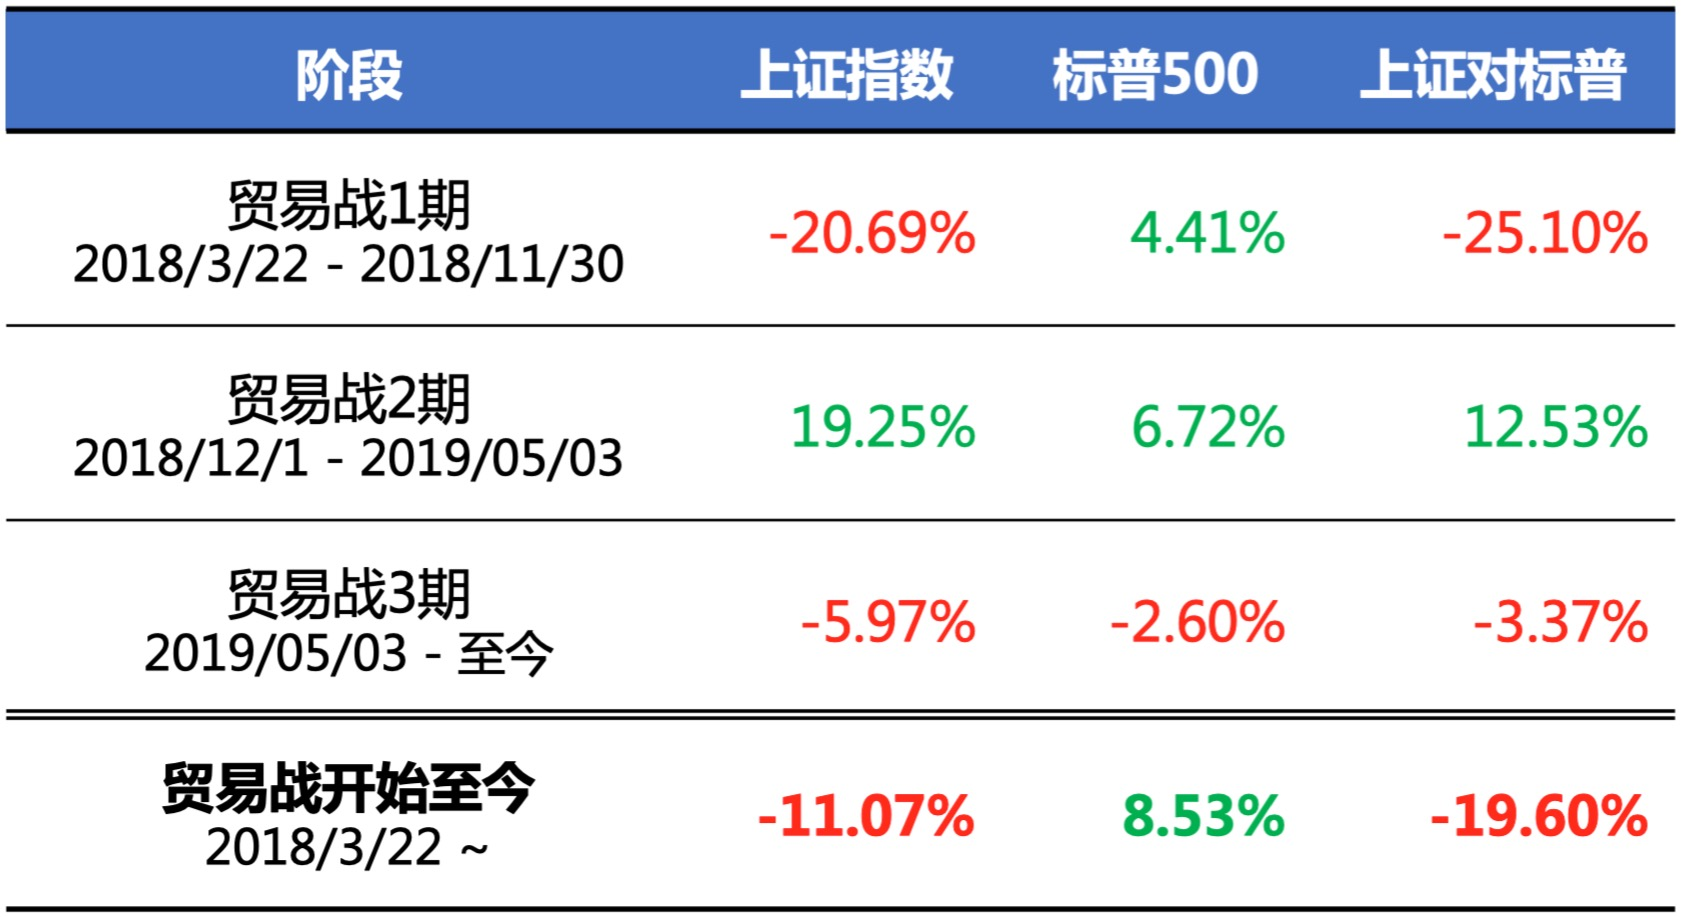

In [22]:
# 显示图片
from IPython.display import Image
Image(filename='/Users/RickyZhang/data_analysis/data_analytic_projects/stock_related/impact_of_trade_war/stock_in_trade_war.jpg',
     width = "50%", height = "50%")

图表清楚地显示贸易战3个阶段两大指数的涨跌幅，贸易战至今上证指数跑输标普500接近20%，并且上证指数对贸易战的反应相对强烈，体现在更大的波幅上。但是，结合观察上文的两大股指走势图，可以发现上证指数对贸易战新闻，尤其是负面的贸易战新闻的反应已经不如以前强烈了。

当然，股票市场不单单受贸易战影响，还受到经济增速、利率、有形的手等等因素影响。当前A股处在近年低位，中国经济增速仍排世界前列，A股估值越具吸引力，随着外资（MSCI、富时等）的不断涌入，国家对内需的拉动，贸易战对经济转型的刺激，A股有望迎来一波上涨。